# KNN Regressor

In [27]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [50]:
data = pd.read_csv(r"C:\Users\heada\Documents\Fall Semester 2023\QTM 347 Machine Learning\Course Project\final_data.csv")

In [43]:
(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(40,62,2)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60])},
             scoring='neg_mean_squared_error')

In [46]:
knn_gscv.best_params_

{'n_neighbors': 58}

In [47]:
import matplotlib.pyplot as plt

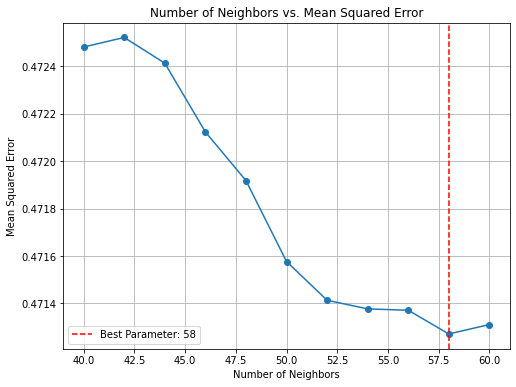

In [48]:
param_values = knn_gscv.cv_results_['param_n_neighbors'].data
mean_squared_errors = -knn_gscv.cv_results_['mean_test_score']  

plt.figure(figsize=(8, 6))
plt.plot(param_values, mean_squared_errors, marker='o', linestyle='-')

best_param = knn_gscv.best_params_['n_neighbors']

plt.axvline(x=best_param, color='red', linestyle='--', label=f'Best Parameter: {best_param}')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Number of Neighbors vs. Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
knn_model = KNeighborsRegressor(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)

y_test_pred = knn_model.predict(X_test)
print(mean_squared_error(y_test, y_test_pred))

0.47375939680803913
